<a href="https://colab.research.google.com/github/nnilayy/Classification-Notebook/blob/main/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
# TO REMOVE WARNINGS USE THIS

import warnings
warnings.filterwarnings("ignore")

# OR USE THIS

# import warnings
# def fxn():
#     warnings.warn("deprecated", DeprecationWarning)

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     fxn()

In [232]:
df=pd.read_csv('/content/winequalityN.csv')

ANALYSIS PORTION

In [ ]:
df

In [ ]:
# To get the idea of the Feature Samples(number of rows) and Feature Columns(number of columns)
df.shape

In [ ]:
# To check the number of classes in Y columns
df["quality"].unique()

In [ ]:
# To check if the classes are balanced or not
print(pd.DataFrame(df["quality"].value_counts()))
print("\n")
print("The Count Plot for the same column is as follows: \n")
sns.countplot(x=df["quality"]);

In [ ]:
# To check for duplicate values in the DataFrame 
# The Following returns the number of samples which are duplicates
# df.duplicated().value_counts()

# This displays all the samples which are duplicated 
# df[df.duplicated()]

# This displays all the unique samples
# df[~df.duplicated()]

# This removes all the duplicated samples
df=df[~df.duplicated()]
df = df.reset_index()
df["type"]=pd.get_dummies(df["type"],drop_first=True)
df=df.drop(["index"], axis=1)
df

In [ ]:
# To get the HeatMap for the DataFrame  
sns.heatmap(df.corr());
# Put "annot=True" to get the correlation value in each box
#sns.heatmap(df.corr(),annot=True); 

In [ ]:
# To get the bottom Non-Repeating half of the HeatMap
corr= df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask=matrix);

## Handling Missing Values

In [255]:
df.isnull()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,False,False,False,False,False,False,False,False,False,False,False,False,False
5325,False,False,False,False,False,False,False,False,False,False,False,False,False
5326,False,False,False,False,False,False,False,False,False,False,True,False,False
5327,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df=df.dropna()
df

## SPLITTING DATA INTO TRAIN AND TEST


In [269]:
X=df.drop(['quality'],axis=1)
y=df['quality']

In [270]:
# OverSampling To create artificially more samples of a class in a column
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
# from imblearn.over_sampling import ADASYN 
os=SMOTE(k_neighbors=1)
# ada = ADASYN(sampling_strategy='minority', n_neighbors=9)
# X_res, y_res = ada.fit_resample(X, y)

os=BorderlineSMOTE(k_neighbors=1)
X_res,y_res=os.fit_resample(X,y)

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=101)

In [272]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.semi_supervised import LabelPropagation
# GaussianProcessClassifier takes the longest time
from lightgbm import LGBMClassifier

# LGBMClassifier(objective='multiclass', random_state=5)
models=[
    ExtraTreesClassifier, RandomForestClassifier, HistGradientBoostingClassifier, 
    BaggingClassifier, GradientBoostingClassifier, XGBClassifier
    ,DecisionTreeClassifier, SVC, 
    MLPClassifier, LinearSVC, KNeighborsClassifier, 
    RidgeClassifier, LogisticRegression, LinearDiscriminantAnalysis, 
    AdaBoostClassifier, QuadraticDiscriminantAnalysis, GaussianNB,
    SGDClassifier, LabelPropagation,LGBMClassifier
]

accuracy = []
for model in models:
  m=model()
  m.fit(X_train,y_train) 
  y_test_pred = m.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_test_pred)*100)
  print('------------------------------------------------------------------------------------------------------------')
  print('------------------------------------------------------------------------------------------------------------') 
  print(model.__name__)
  print(classification_report(y_test, y_test_pred)) 
# Extracting the model name from the models
model_names=[]
for model in models:
  model_names.append(model.__name__)

# Combining the Model Name and Accuracy in a dataframe
# Here Model_Names and Accuracy Both are lists
# acc=pd.DataFrame(list(zip(model_names,accuracy)),columns=['Name','Accuracy'])
acc=pd.DataFrame({'Name':model_names, 'Accuracy':accuracy})

# Arranging the dataframe by the models with the highest accuracy to lowest accuracy
acc=acc.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)
acc.index = acc.index + 1
acc

<Figure size 2880x2880 with 0 Axes>

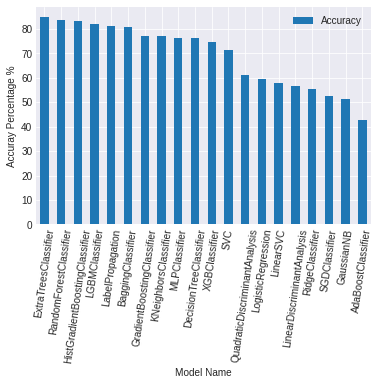

In [275]:
# Plotting the Accuracy of Different Models
fig=plt.figure(figsize=(20,30))
fig.set_size_inches(40,40)
acc.plot(kind ='bar',x="Name",y='Accuracy')
plt.xlabel('Model Name')
plt.ylabel('Accuray Percentage %')
plt.xticks(rotation=82);
plt.show()

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# mae = mean_absolute_error(y_test, y_test_pred)
# mse = mean_squ ared_error(y_test, y_test_pred)
# rmse = np.sqrt(mse)


In [ ]:
# PAIR PLOT 

# fig=plt.figure(figsize=(20,30))
# fig.set_size_inches(8,8)
# plt.style.use('seaborn-darkgrid')
# sns.pairplot(df, hue='quality')

In [ ]:
# df.columns 
# df.columns.values
# df.columns.values.tolist()
# pd.DataFrame(df.columns)

In [ ]:
# Converting Numeric Column with repeating value to string to get a scatter plot
# plt.scatter(df['Year'].astype(str),y)
# print(sns.scatterplot(x=df['State_Name'],y=y))
# plt.figure(figsize=(15,10),dpi=300)
# plt.xticks(rotation=90)
# plt.line(x=df['sulphates'],y=df['quality'])
# plt.scatter(x=df['chlorides'],y=df['quality'])
# sns.lineplot(x=df['sulphates'],y=df['quality'])
# plt.show()

In [ ]:
# df['quality'].unique() 
# df.corr()

# # Returns the columns with just numeric columns
# df.select_dtypes(include=['number'])
# g=sns.PairGrid(df)
# g.map(plt.scatter)
# # Balanced Dataset or not

In [ ]:
# Plotting the Accuracy of Different Models
# fig=plt.figure(figsize=(20,30))
# fig.set_size_inches(40,40)
# acc.plot(kind ='bar',x="Name",y='Accuracy')
# plt.xlabel('Model Name')
# plt.ylabel('Accuray Percentage %')
# plt.xticks(rotation=82);
# plt.show()

In [ ]:
# df.info()
# df['quality'].plot(kind='kde')
# fig = plt.gcf()
# fig.set_size_inches(15, 10)
# df=df[df['total sulfur dioxide']<155]
# sns.scatterplot(x=df['total sulfur dioxide'],y=df['quality'],c=df['quality'],alpha=0.5)
# plt.legend()

In [ ]:
# How to Drop Multiple rows
# Find the rows, 
# Save them, 
# Drop them using their index
# dr=df[(df['total sulfur dioxide']>100) & (df['quality']==4)]
# df=df.drop(dr.index,axis=0)

In [ ]:
# plt.style.use('seaborn-whitegrid')
# plt.style.use('dark_background')
# _, axes = plt.subplots(4, 3, figsize=(25,25))
# for (((x,y),value), column) in zip(np.ndenumerate(axes),columns):
#   sns.boxplot(y=df[column], x=df['quality'],ax=axes[x][y])

In [ ]:
# def get_redundant_pairs(df):
#     '''Get diagonal and lower triangular pairs of correlation matrix'''
#     pairs_to_drop = set()
#     cols = df.columns
#     for i in range(0, df.shape[1]):
#         for j in range(0, i+1):
#             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

# def get_top_abs_correlations(df, n=5):
#     au_corr = df.corr().abs().unstack()
#     labels_to_drop = get_redundant_pairs(df)
#     au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
#     return au_corr[0:n]

# print("Top Absolute Correlations")
# pd.DataFrame(get_top_abs_correlations(df, 10))

In [ ]:
# sns.scatterplot
# sns.pairplot 
# sns.barplot 
# sns.boxplot 
# sns.countplot

In [ ]:
# column=df['quality']
# q3=column.quantile(0.75)
# q1=column.quantile(0.25)
# iqr=q3-q1
# lb=q1-1*iqr
# ub=q3+1*iqr
# filter = (column>=lb) & (column<=ub)
# df=df[filter]
# sns.boxplot(y=column)
# plt.show()

In [ ]:
# columns=df.columns
# plt.style.use('seaborn-darkgrid')
# _, axes = plt.subplots(4, 3, figsize=(25,25))
# for (((x,y),value), column) in zip(np.ndenumerate(axes),columns):
#   sns.boxplot(data=df,y=df[column], x=df['quality'], ax=axes[x][y])

In [ ]:
# Look for Categorgical Columns 